Get list of all classes

In [18]:
import csv

csvPath = 'AxieDetailsNew.csv'

listOfClasses = []
with open(csvPath, encoding="utf8") as myFile:
    heading = next(myFile)
    readerObj = list(csv.reader(myFile))

    xxx = 0
    for row in readerObj:
        if row[15] not in listOfClasses:
            listOfClasses.append(row[15])
        xxx += 1
        if xxx == 200000:
            break
    
print(listOfClasses)


['None', 'Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn', '']


Remove badClasses from listOfClasses

In [19]:
badClasses = ['None', '']

print(listOfClasses)
listOfGoodClasses = [x for x in listOfClasses if x not in badClasses]
print(listOfGoodClasses)

['None', 'Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn', '']
['Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn']


Get dict of prices for all classes - creating dict

In [26]:
allClassesDict = {}

for x in range(len(listOfGoodClasses)):
    allClassesDict[listOfGoodClasses[x]]=[]

print(allClassesDict)

{'Beast': [], 'Aquatic': [], 'Bug': [], 'Plant': [], 'Bird': [], 'Reptile': [], 'Dusk': [], 'Mech': [], 'Dawn': []}


In [ ]:
#TESTING
#allClassesDict[listOfGoodClasses[0]].append('one')
#allClassesDict[listOfGoodClasses[0]].append('two')
#allClassesDict

Get dict of prices for all classes - adding prices

In [28]:
#PriceRow should be PriceColumn, 
# but fuck it its 2AM
breedCountRow = 10
priceRow = 4
priceLastRow = 23
priceQuickRow = 24
priceReasonableRow = 25
pricePatientRow = 26
priceRows = [priceRow, priceLastRow, priceQuickRow, priceReasonableRow, pricePatientRow]
listOfNonPrices = ["This Axie ist not for sale", ""]

with open(csvPath, encoding="utf8") as myFile:
    heading = next(myFile)
    readerObj = list(csv.reader(myFile))


    xxx = 0
    #gets single row
    for row in readerObj:
        #tries all price columns
        for price in priceRows:
            if row[price] not in listOfNonPrices:
                if row[15] in listOfGoodClasses:
                    allClassesDict[listOfGoodClasses[listOfGoodClasses.index(row[15])]].append(row[price].replace(" WETH" ,""))
                break
        xxx += 1
        if xxx == 200000:
            break

#allClassesDict
print('Done!!')

Done!!


Graph it!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[7.427461660266983, 11.927716444450667, 12.306725692764527, 13.775742494863437, 2.693114954093388, 7.408010316957772, 3.0664096333333326, 0.32950199999999996, 35.5539564]
dict_keys(['Beast', 'Aquatic', 'Bug', 'Plant', 'Bird', 'Reptile', 'Dusk', 'Mech', 'Dawn'])


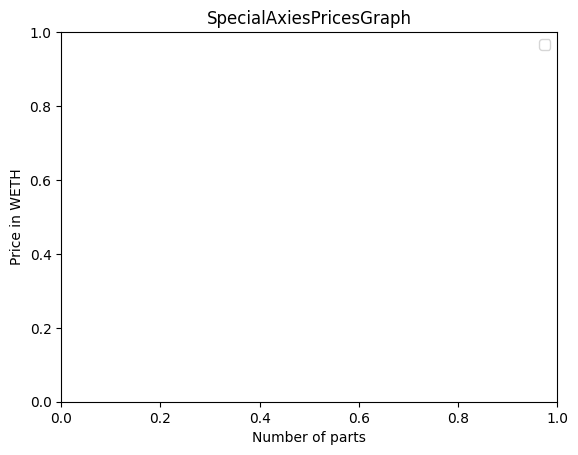

In [42]:
import matplotlib.pyplot as plt
import numpy as np

listOfNames = allClassesDict.keys()
listOfMeans = []
for item in allClassesDict:
    #convert value list from allClassesDict strings to list of floats and get mean
    listOfMeans.append(np.mean([float(i) for i in allClassesDict[item]]))

print(listOfMeans)
print(listOfNames)
plt.legend()
plt.xlabel("Number of parts")
plt.ylabel("Price in WETH")
plt.title("SpecialAxiesPricesGraph")
plt.show()